[View in Colaboratory](https://colab.research.google.com/github/rdenadai/dsp_study_notebooks/blob/master/notebooks/dsp101b.ipynb)

## DSP 101b

Experiments on Digital Signal Processing, ranging from random generated signals, voice and images!

In these experiments, we are not analysing signals in the range of DSP but also with an statistical view...

To build this document we use a lot of resources, here are some of the most important.
- References:
 - [DSP Guide](http://www.dspguide.com)
 - [Plotly FFT Filters](https://plot.ly/python/fft-filters/)
 - [Digital Signal Processing {youtube}](https://www.youtube.com/playlist?list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et)
 - [Signal Processing 101 {youtube}](https://www.youtube.com/watch?v=KZd68xgasIU&list=PLJ-OcUCIty7evBmHvYRv66RcuziszpSFB)
 - [All Signal Processing {youtube}](https://www.youtube.com/user/allsignalprocessing/playlists)

In [0]:
import math
import random
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.signal import resample
from scipy import interpolate
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.display import Audio

%matplotlib inline

def normalization(x):
    return (((x - min(x)) / (max(x) - min(x))) * 255).astype('int64')

In [0]:
def sine(A=4096, f=1, t=1, Fs=1024, phi=0):
    # A = 4096              # amplitude (deslocamento vertical)
    # phi = 0               # fase (deslocamento horizontal)
    # f = 1                 # frequencia em hz (quantas oscilações em 1 segundo)
    # t = 1                 # tempo em segundos
    # Fs = 200              # frequencia de amostragem (pontos por segundo)
    # k = np.linspace (0, t, Fs);
    # return (A * np.sin((((2 * np.pi * f) * k)) + phi)).astype('int16')
    n = np.arange(Fs * t)
    return (A * np.sin((((2 * np.pi * f) * n) / Fs) + phi)).astype('int16')

def resamp_presenter(x, num):
    y = np.zeros(x.size)
    y[y==0] = np.nan
    y[::num] = x[::num]
    return y, math.ceil(len(x) / num)

def resamp(x, num):
    return x[::num]

### LTI Systems (Linear Time-Invariant)

 > *"It investigates the response of a linear and time-invariant system to an arbitrary input signal."*  [wiki](https://en.wikipedia.org/wiki/Linear_time-invariant_theory)
 
 #### Homogeneity:
 
 $x(t)   => LTI => y(t)$
 
 $kx(t) => LTI => ky(t), k \in \mathbb{R}$
 
 **Proof:**
 
 Given a LTI system with impulse response h[n] been [1, 0, 1, 0] we can prove the homogeneity by multiplying the signal by a k factor.

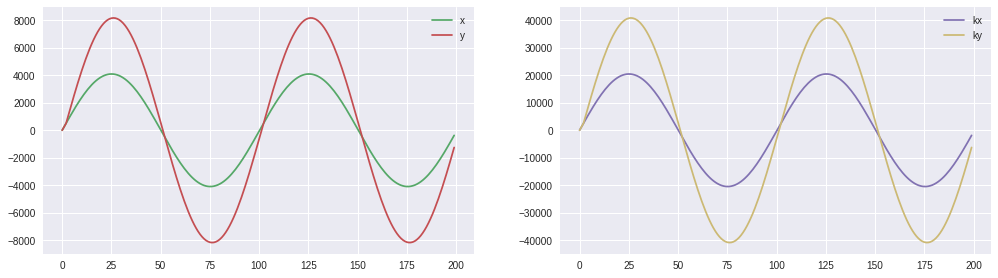

('y    = Min / Max: ', -8175, '    / ', 8175)
('ky   = Min / Max: ', -40875.0, ' / ', 40875.0)
('ky/k = Min / Max: ', -8175.0, '  / ', 8175.0)
--------------------
('Are equals? Sum of the difference: ', 0.0)


In [5]:
t=5

# h represents the impulse response of a LTI system
h = np.array(np.tile([1, 0], 2))

# since we are in time domain, we use the convolution
x = sine(f=440, t=t, Fs=44100)
y = np.convolve(x, h)

k = 5.  # k is a simple constant to check linearity
kx = k * x
ky = np.convolve(kx, h)

# showdown
fig = plt.figure(6, figsize=(17, 10))
plt.subplot(221)
plt.plot(x[:200], label='x', color='C1')
plt.plot(y[:200], label='y', color='C2')
plt.legend()
plt.subplot(222)
plt.plot(kx[:200], label='kx', color='C3')
plt.plot(ky[:200], label='ky', color='C4')
plt.legend()
plt.show()

print('y    = Min / Max: ', np.min(y), '    / ', np.max(y))
print('ky   = Min / Max: ', np.min(ky), ' / ', np.max(ky))
print('ky/k = Min / Max: ', np.min(ky/k), '  / ', np.max(ky/k))
print('-' * 20)
print('Are equals? Sum of the difference: ', np.sum(y - (ky/k)))

#### Additivity


$x_1(t) => LTI => y_1(t)$

$x_2(t) => LTI => y_2(t)$

$x_1(t) + x_2(t) => LTI => y_1(t) + y_2(t)$

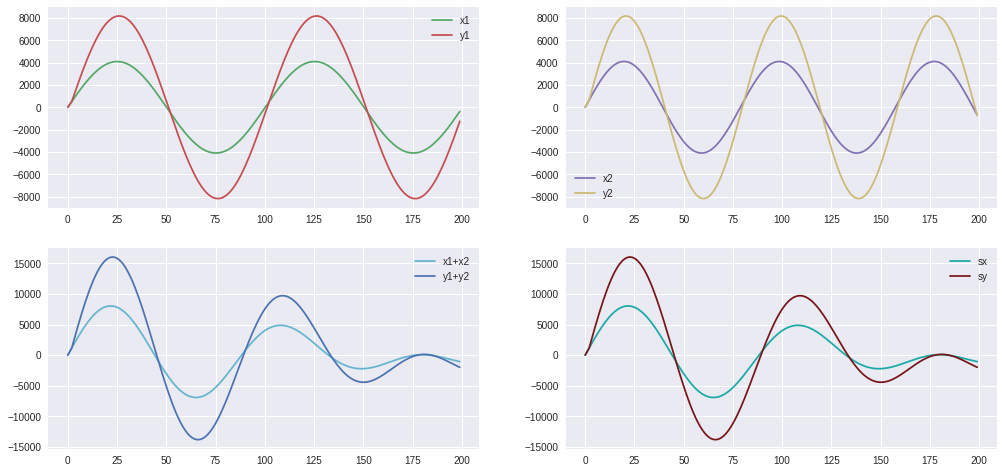

In [6]:
# since we are in time domain, we use the convolution
x1 = sine(f=440, t=t, Fs=44100)
y1 = np.convolve(x1, h)

x2 = sine(f=560, t=t, Fs=44100)
y2 = np.convolve(x2, h)

sx = x1 + x2
sy = np.convolve(sx, h)

# showdown
fig = plt.figure(6, figsize=(17, 17))
plt.subplot(421)
plt.plot(x1[:200], label='x1', color='C1')
plt.plot(y1[:200], label='y1', color='C2')
plt.legend()
plt.subplot(422)
plt.plot(x2[:200], label='x2', color='C3')
plt.plot(y2[:200], label='y2', color='C4')
plt.legend()
plt.subplot(423)
plt.plot((x1+x2)[:200], label='x1+x2', color='C5')
plt.plot((y1+y2)[:200], label='y1+y2', color='C6')
plt.legend()
plt.subplot(424)
plt.plot(sx[:200], label='sx', color='#1aaaa5')
plt.plot(sy[:200], label='sy', color='#771619')
plt.legend()
plt.show()

#### Shift-Invariance

$x(t + s) => LTI => y(t + s)$

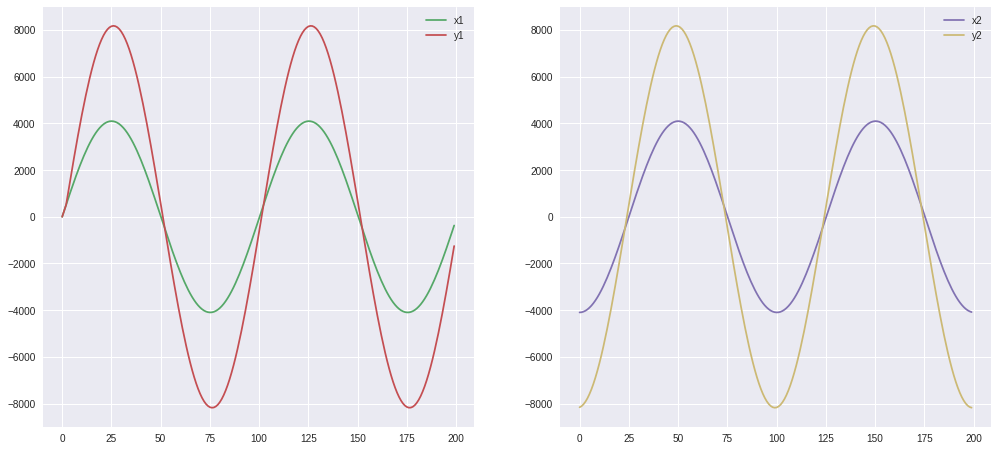

In [7]:
s = 25

# since we are in time domain, we use the convolution
x1 = sine(f=440, t=t, Fs=44100)
y1 = np.convolve(x1, h)

x2 = np.roll(sine(f=440, t=t, Fs=44100), s)
y2 = np.convolve(x2, h)

# showdown
fig = plt.figure(6, figsize=(17, 17))
plt.subplot(221)
plt.plot(x1[:200], label='x1', color='C1')
plt.plot(y1[:200], label='y1', color='C2')
plt.legend()
plt.subplot(222)
plt.plot(x2[:200], label='x2', color='C3')
plt.plot(y2[2:202], label='y2', color='C4')
plt.legend()
plt.show()

## Convolution

**Impulse response** represents the response of a system when a delta function is the input of the system.

A **delta function** is a signal that only has value of one in the zero position, it's represented in terms of *continuos signal* as [Dirac Delta](https://en.wikipedia.org/wiki/Dirac_delta_function).

$\delta[n] => LTI => h[n]$

As a mathematical operation **convolution** is representated with the star signal ***** such as:

$y[n] = x[n] * h[n]$

Important to note that if the system is considered a **filter**, the impulse response is called *filter kernel*, or simply a *kernel*.

### Simple mathematical example:

IF *K*=5 and *D*=3, then:

$P = K + D - 1$

$P = 5 + 3 - 1 \Rightarrow P = 7$


Convolution example *K*=2 e *D*=3:

$y[0] = x[0] . h[0]$

$y[1] = x[0] . h[1] + x[1] . h[0]$

$y[2] = x[0] . h[2] + x[1] . h[1] + x[2] . h[0]$

$y[3] = x[1] . h[2] + x[2] . h[1] + x[3] . h[0]$


### Example:

As an example lets build a simple signal and use both a low and high pass filter with blackman window showing each of the signals summed together.

The final signal is the sum of a sinusoidal wave and a slowing rising ramp. The low pass filter will try to represent the rising ramp, showing low frequencies, the high pass filter will retrieve the high frequency.

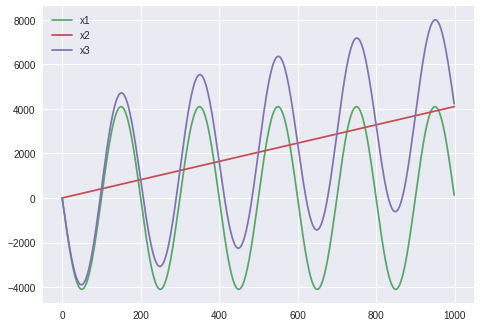

In [8]:
x1 = np.roll(sine(f=5, t=1, Fs=1000), 100)
x2 = np.linspace(0, 4096, 1000)
x3 = x1 + x2

fig = plt.figure(6, figsize=(17, 12))
plt.subplot(221)
plt.plot(x1, label='x1', color='C1')
plt.plot(x2, label='x2', color='C2')
plt.plot(x3, label='x3', color='C3')
plt.legend()
plt.show()

** ( a ) ** This is the use of a **low pass filter** and the result of using this filter is represented in the last graph that retrieve a somehow rising ramp.

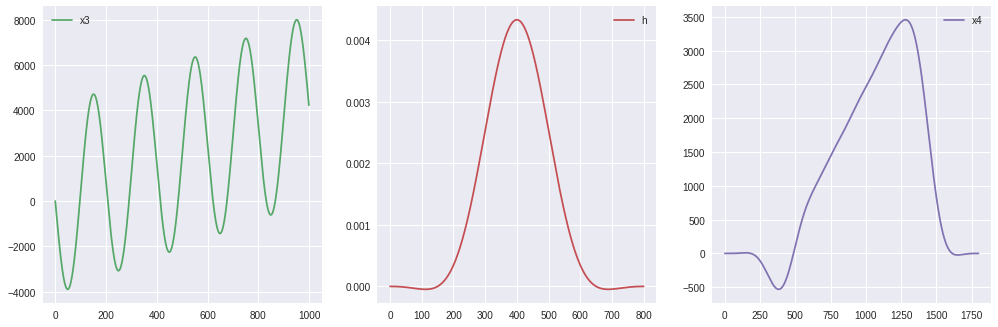

In [9]:
def low_pass_filter(fc=.002, b=.005):
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    h = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    h = h * window
    return h / np.sum(h)

h = low_pass_filter() # filter
x4 = np.convolve(x3, h) # convolution

fig = plt.figure(6, figsize=(17, 12))
plt.subplot(231)
plt.plot(x3, label='x3', color='C1')
plt.legend()
plt.subplot(232)
plt.plot(h, label='h', color='C2')
plt.legend()
plt.subplot(233)
plt.plot(x4, label='x4', color='C3')
plt.legend()
plt.show()

**( b )** As said above applying the **high pass filter** returns the high frequency, which in this case is the sinusoidal wave.

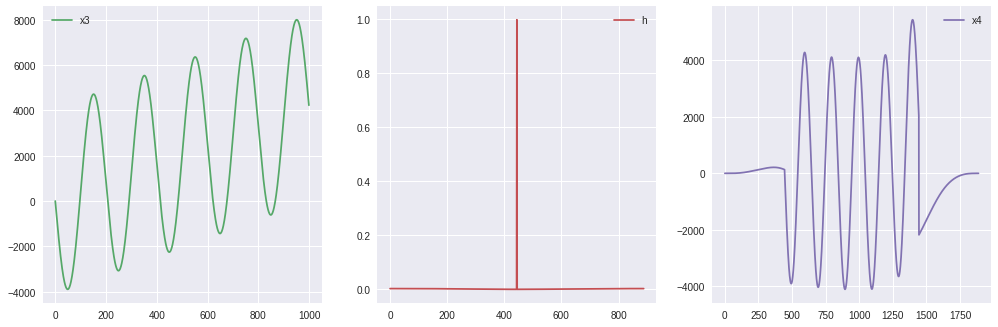

In [10]:
def high_pass_filter(fc=.00001, b=.0045):
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    h = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = np.blackman(N)
    h = h * window
    h = h / np.sum(h)

    # reverse function
    h = -h
    h[int((N - 1) / 2)] += 1
    return h

h = high_pass_filter() # filter
x4 = np.convolve(x3, h) # convolution

fig = plt.figure(6, figsize=(17, 12))
plt.subplot(231)
plt.plot(x3, label='x3', color='C1')
plt.legend()
plt.subplot(232)
plt.plot(h, label='h', color='C2')
plt.legend()
plt.subplot(233)
plt.plot(x4, label='x4', color='C3')
plt.legend()
plt.show()